In [1]:
# import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('Telco_Customer_Churn_Dataset  (1).csv') # load the dataset
print(df.head()) # display the first few rows of the dataset

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

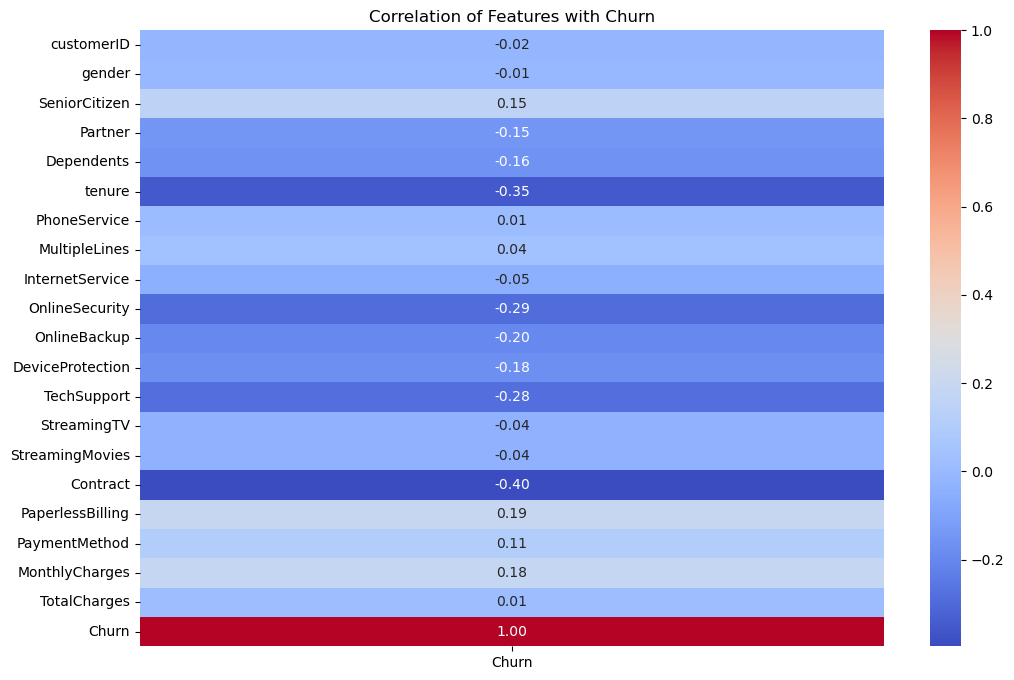

In [2]:
# Handle categorical columns by encoding them
categorical_columns = ['Contract', 'PaymentMethod', 'MultipleLines', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'customerID', 'PaperlessBilling', 'gender', 'Partner', 'Dependents', 'PhoneService', 
                        'StreamingTV', 'StreamingMovies', 'TotalCharges', 'MonthlyCharges']

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert 'Churn' column to numeric if it's in string format
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns, especially 'customerID'
df_numeric = df.select_dtypes(include=[np.number])  # Only keep numeric columns

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Churn']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Features with Churn")
plt.show()

# Conclusion:
# 1- Using feature relevance analysis and domain knowledge, the attributes MonthlyCharges, PaymentMethod, SeniorCitizen and PaperlessBilling were identified as the most influential features for Churn prediction.
# 2- These influential features reflect cost sensitivity, payment convenience, customer demographics and service integration.